# K-MEANS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv(r'..\data\data_processed\data_processed.csv')

In [ ]:
X = data.drop('Target', axis = 1)
X = StandardScaler().fit_transform(X)
y = data['Target']

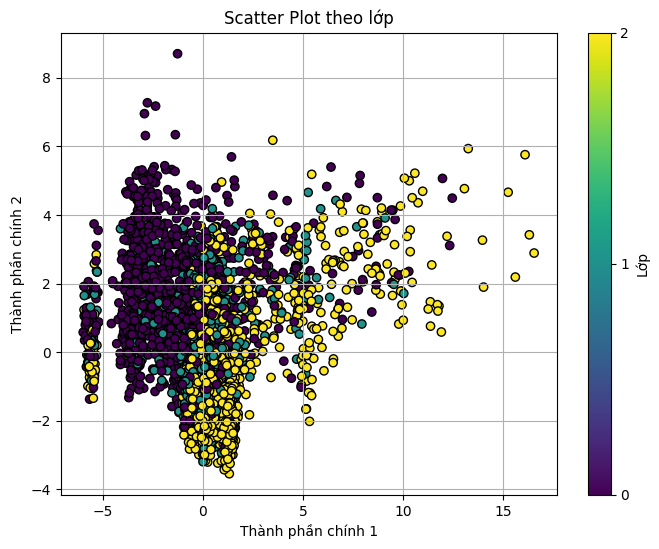

In [4]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')

plt.title('Scatter Plot theo lớp')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Lớp')
plt.grid(True)
plt.show()


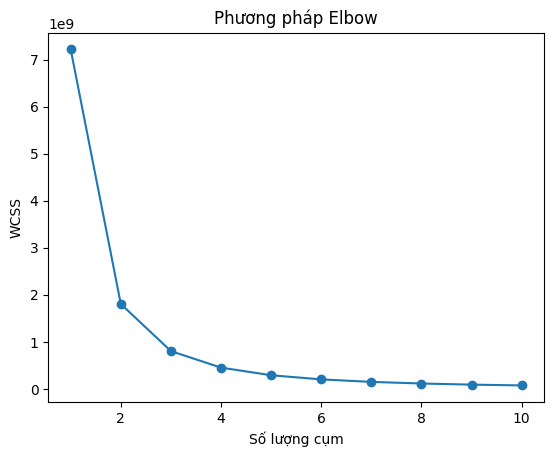

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Phương pháp Elbow')
plt.xlabel('Số lượng cụm')
plt.ylabel('WCSS')
plt.show()


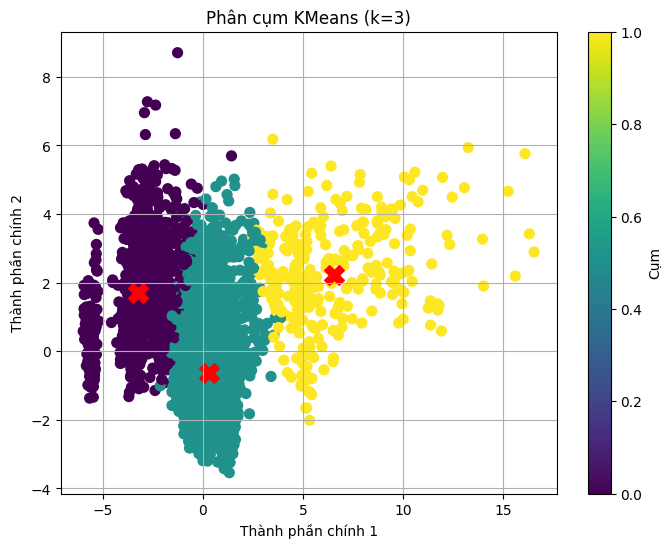

In [6]:
# Huấn luyện KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)
centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Tâm cụm')
plt.title('Phân cụm KMeans (k=3)')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.colorbar(label='Cụm')
plt.grid(True)
plt.show()

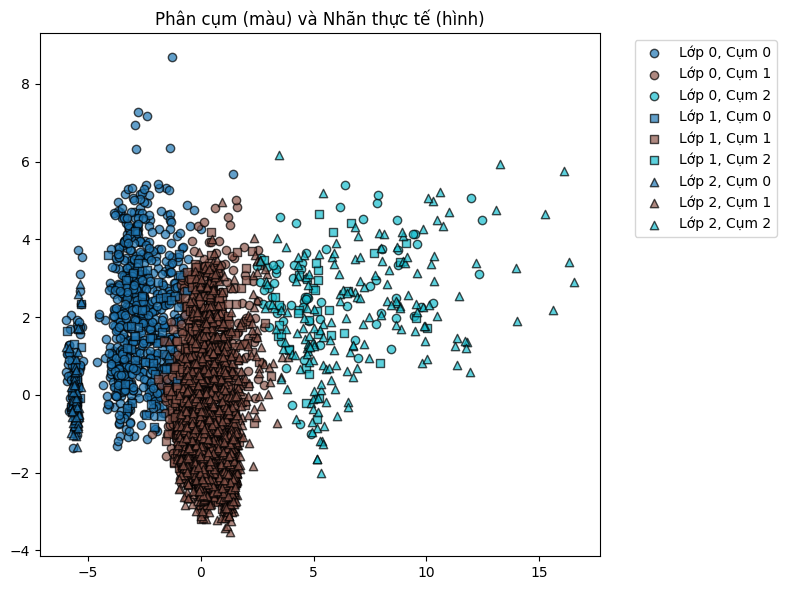

In [7]:
markers = ['o', 's', '^']  # Tuỳ số nhãn
labels_cluster = clusters
unique_labels = np.unique(y)
unique_clusters = np.unique(labels_cluster)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))  # Tạo màu cho từng cụm

plt.figure(figsize=(8, 6))

for i, label in enumerate(unique_labels):
    for j, cluster in enumerate(unique_clusters):
        mask = (y == label) & (labels_cluster == cluster)
        plt.scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            color=colors[j],
            marker=markers[i % len(markers)],
            label=f'Lớp {label}, Cụm {cluster}',
            edgecolors='k',  # viền đen cho rõ
            alpha=0.7
        )

plt.title("Phân cụm (màu) và Nhãn thực tế (hình)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score,normalized_mutual_info_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score


print('UNSUPERVISED EVALUTION:')
print('Silhouette Score:', silhouette_score(X, clusters))
print('DBI:', davies_bouldin_score(X, clusters))
print('CH:', calinski_harabasz_score(X, clusters))

print('\nSUPERVISED EVALUTION:')
print('ARI:', adjusted_rand_score(y, clusters))
print('FMI:', fowlkes_mallows_score(y, clusters))
print('NMI:', normalized_mutual_info_score(y, clusters))



UNSUPERVISED EVALUTION:
Silhouette Score: 0.20007584551855637
DBI: 2.0074384740180733
CH: 539.2459761968198

SUPERVISED EVALUTION:
ARI: 0.16142755691556748
FMI: 0.5638897176311984
NMI: 0.16559049275492005
